<a href="https://colab.research.google.com/github/EG-Kim/pytorch_example_01/blob/master/6_Feedforward_Neural_Network_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Feedforward Neural Network (Cifar 10)

#### CIFAR-10 dataset

32*32 pixel의 60000개 컬러 이미지

아래 이미지와 같이 10개의 클래스로 구분

![대체 텍스트](https://user-images.githubusercontent.com/15958325/63308580-41b7fe80-c32e-11e9-827f-98052675c0ea.png)

#### 모듈 불러오기

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

#### Device configuration

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


#### Hyper-parameters 

In [ ]:
# Hyper-parameters 
input_size = 32*32*3 # color image RGB 3개 채널
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

#### Fashion MNIST dataset 

In [ ]:
# CIFAR 10 dataset 
train_dataset = torchvision.datasets.CIFAR10(root='../../data', 
                                             train=True, 
                                             transform=transforms.ToTensor(),  
                                             download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../data', 
                                            train=False, 
                                            transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../../data/cifar-10-python.tar.gz to ../../data


In [ ]:
len(train_loader)

500

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape

torch.Size([100, 3, 32, 32])

#### Fully connected neural network with one hidden layer

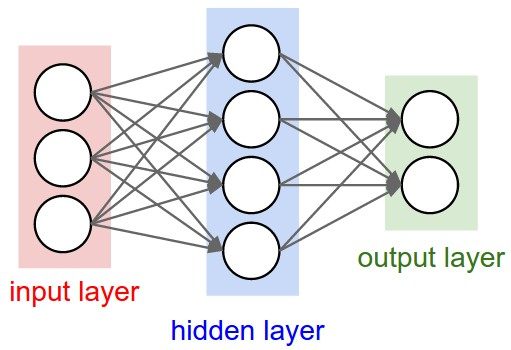

In [ ]:
# hidden layer = 1인 모델 만들기
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes): # 생성자 정의
        super(NeuralNet, self).__init__() # super() 함수: 부르면 여기서 만든 NeuralNet class는 nn.Module class의 속성들을 가지고 초기화됨
        self.fc1 = nn.Linear(input_size, hidden_size) # fully connected layer
        self.relu = nn.ReLU() # activation function
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x): # 전방계산
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

#### Loss and optimizer


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

#### Train the model

In [ ]:
total_step = len(train_loader) # # total train dataset 50000 / batch size 100 = 500
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 3*32*32).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/500], Loss: 2.2891
Epoch [1/5], Step [200/500], Loss: 2.2574
Epoch [1/5], Step [300/500], Loss: 2.2621
Epoch [1/5], Step [400/500], Loss: 2.2257
Epoch [1/5], Step [500/500], Loss: 2.2265
Epoch [2/5], Step [100/500], Loss: 2.2270
Epoch [2/5], Step [200/500], Loss: 2.1780
Epoch [2/5], Step [300/500], Loss: 2.1691
Epoch [2/5], Step [400/500], Loss: 2.1475
Epoch [2/5], Step [500/500], Loss: 2.1463
Epoch [3/5], Step [100/500], Loss: 2.1311
Epoch [3/5], Step [200/500], Loss: 2.1457
Epoch [3/5], Step [300/500], Loss: 2.0991
Epoch [3/5], Step [400/500], Loss: 2.0881
Epoch [3/5], Step [500/500], Loss: 2.1579
Epoch [4/5], Step [100/500], Loss: 2.0959
Epoch [4/5], Step [200/500], Loss: 2.0860
Epoch [4/5], Step [300/500], Loss: 2.1008
Epoch [4/5], Step [400/500], Loss: 2.1266
Epoch [4/5], Step [500/500], Loss: 2.0024
Epoch [5/5], Step [100/500], Loss: 1.9905
Epoch [5/5], Step [200/500], Loss: 2.0620
Epoch [5/5], Step [300/500], Loss: 1.9485
Epoch [5/5], Step [400/500], Loss:

#### Test the model

In [ ]:
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 32*32*3).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


Accuracy of the network on the 10000 test images: 30.43 %


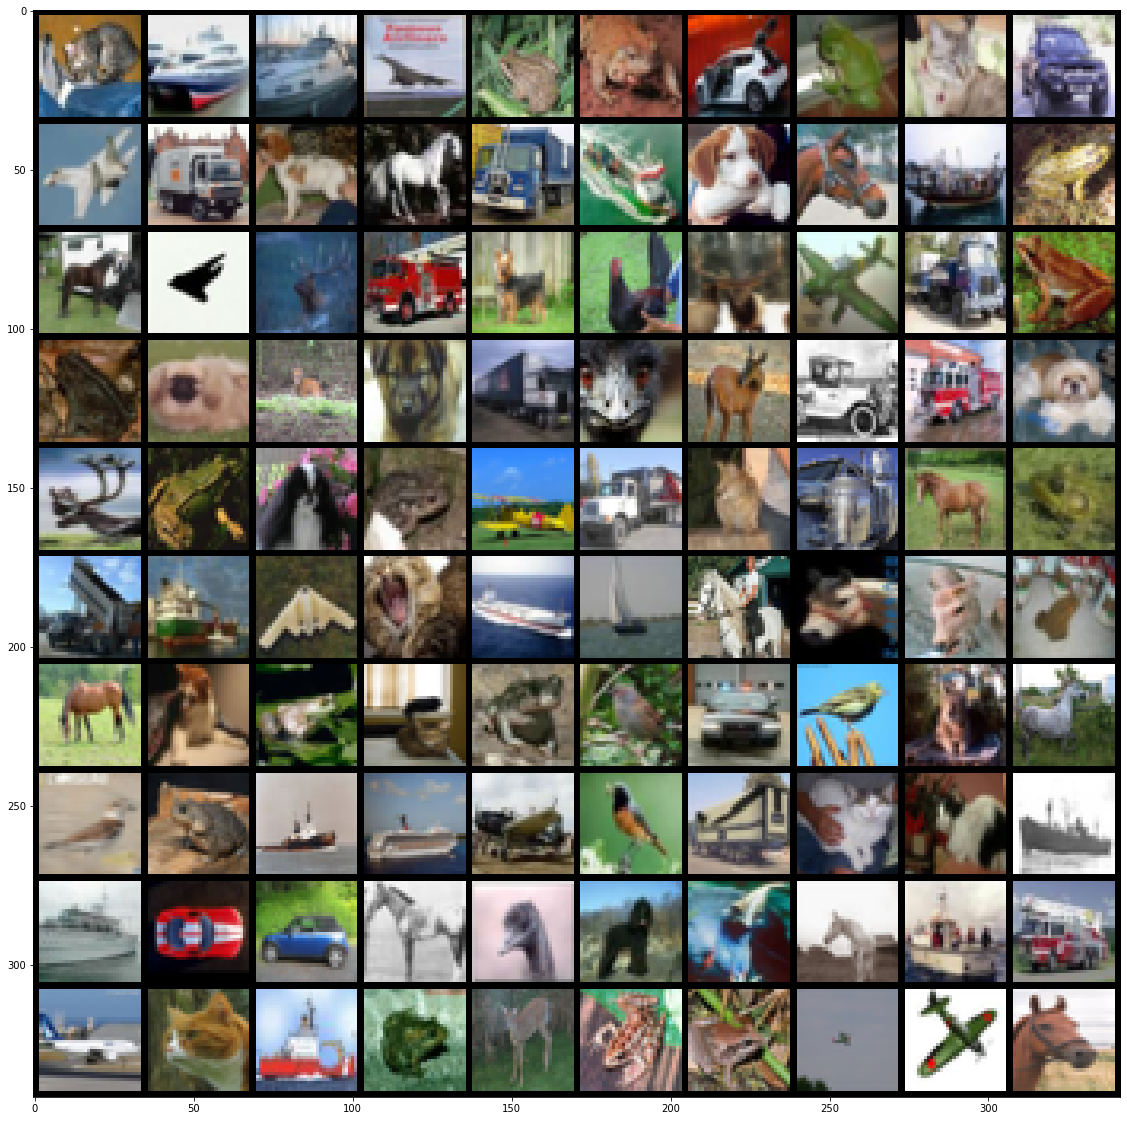

ground truth:  tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
        5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9,
        7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6,
        8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6,
        6, 0, 0, 7])
predicted:  tensor([3, 8, 8, 8, 5, 6, 5, 4, 5, 8, 0, 9, 5, 8, 9, 8, 5, 2, 9, 5, 9, 0, 0, 7,
        7, 8, 7, 9, 1, 6, 6, 2, 5, 2, 9, 5, 7, 9, 9, 5, 0, 4, 9, 4, 8, 9, 5, 8,
        4, 6, 8, 8, 5, 9, 8, 8, 5, 5, 0, 2, 4, 5, 6, 9, 7, 4, 1, 0, 9, 9, 2, 5,
        8, 8, 9, 2, 9, 5, 5, 9, 8, 5, 4, 0, 0, 9, 0, 8, 8, 8, 8, 5, 8, 0, 0, 7,
        6, 0, 7, 9], device='cuda:0')


In [ ]:
# functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.figure(figsize=(20, 20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


with torch.no_grad():
    # get some random training images
    dataiter = iter(test_loader)
    images, labels = dataiter.next()

    # show images
    imshow(torchvision.utils.make_grid(images, nrow=10))
    
    images = images.reshape(-1, 32*32*3).to(device)
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    

    
    # print labels
    print("ground truth: ", labels)
    print("predicted: ", predicted)

## 실습


https://paperswithcode.com/sota/image-classification-on-cifar-10

hyper parameter를 조절하여 45% 이상의 정확도를 달성하세요.

In [ ]:
# Hyper-parameters 
input_size = 32*32*3
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001


class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 32*32*3).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
            
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 32*32*3).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


Epoch [1/10], Step [100/500], Loss: 2.2802
Epoch [1/10], Step [200/500], Loss: 2.2725
Epoch [1/10], Step [300/500], Loss: 2.2515
Epoch [1/10], Step [400/500], Loss: 2.2231
Epoch [1/10], Step [500/500], Loss: 2.1899
Epoch [2/10], Step [100/500], Loss: 2.2088
Epoch [2/10], Step [200/500], Loss: 2.1860
Epoch [2/10], Step [300/500], Loss: 2.1891
Epoch [2/10], Step [400/500], Loss: 2.1811
Epoch [2/10], Step [500/500], Loss: 2.1379
Epoch [3/10], Step [100/500], Loss: 2.1779
Epoch [3/10], Step [200/500], Loss: 2.1123
Epoch [3/10], Step [300/500], Loss: 2.1132
Epoch [3/10], Step [400/500], Loss: 2.0612
Epoch [3/10], Step [500/500], Loss: 2.0885
Epoch [4/10], Step [100/500], Loss: 2.0934
Epoch [4/10], Step [200/500], Loss: 2.0358
Epoch [4/10], Step [300/500], Loss: 2.0870
Epoch [4/10], Step [400/500], Loss: 2.0905
Epoch [4/10], Step [500/500], Loss: 2.0394
Epoch [5/10], Step [100/500], Loss: 1.9587
Epoch [5/10], Step [200/500], Loss: 2.0734
Epoch [5/10], Step [300/500], Loss: 2.0923
Epoch [5/10

다음 주차 CNN 코드 맛보기

In [ ]:
# Hyper-parameters 
input_size = (32, 32)
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.0006


class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.LeakyReLU()
        self.fc2 = nn.Linear(4*4*64, num_classes)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu(out)
        out = self.pool(out)

        out = self.conv2(out)
        out = self.relu(out)
        out = self.pool(out)

        out = self.conv3(out)
        out = self.relu(out)
        out = self.pool(out)

        out = out.reshape(-1, 4*4*64)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
            
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch [1/10], Step [100/500], Loss: 1.9205
Epoch [1/10], Step [200/500], Loss: 1.9092
Epoch [1/10], Step [300/500], Loss: 1.5198
Epoch [1/10], Step [400/500], Loss: 1.4076
Epoch [1/10], Step [500/500], Loss: 1.4367
Epoch [2/10], Step [100/500], Loss: 1.4264
Epoch [2/10], Step [200/500], Loss: 1.2237
Epoch [2/10], Step [300/500], Loss: 1.2469
Epoch [2/10], Step [400/500], Loss: 1.2540
Epoch [2/10], Step [500/500], Loss: 1.1851
Epoch [3/10], Step [100/500], Loss: 1.1220
Epoch [3/10], Step [200/500], Loss: 1.2028
Epoch [3/10], Step [300/500], Loss: 1.2898
Epoch [3/10], Step [400/500], Loss: 1.2876
Epoch [3/10], Step [500/500], Loss: 1.1240
Epoch [4/10], Step [100/500], Loss: 1.2482
Epoch [4/10], Step [200/500], Loss: 1.0595
Epoch [4/10], Step [300/500], Loss: 1.1525
Epoch [4/10], Step [400/500], Loss: 0.9591
Epoch [4/10], Step [500/500], Loss: 0.9252
Epoch [5/10], Step [100/500], Loss: 0.9189
Epoch [5/10], Step [200/500], Loss: 1.2522
Epoch [5/10], Step [300/500], Loss: 0.9743
Epoch [5/10